In [1]:
#Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Data location
import os
os.chdir('D:\\DS\\Python DS\\Sample\\Human WeightHeight\\')

In [6]:
#Read Data
dataset = pd.read_csv("Human WeightHeight.csv")

In [7]:
dataset

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.99250
1,2,71.51521,136.48730
2,3,69.39874,153.02690
3,4,68.21660,142.33540
4,5,67.78781,144.29710
5,6,68.69784,123.30240
6,7,69.80204,141.49470
7,8,70.01472,136.46230
8,9,67.90265,112.37230
9,10,66.78236,120.66720


In [8]:
#check for null
dataset.isnull().sum()

Index             0
Height(Inches)    0
Weight(Pounds)    0
dtype: int64

In [54]:
dataset.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


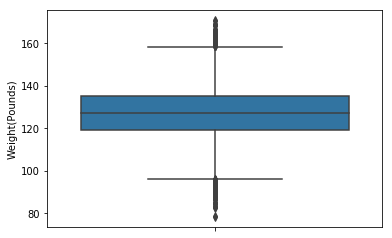

In [56]:
sns.boxplot(y="Weight(Pounds)", data=dataset)

<Figure size 1440x1440 with 0 Axes>

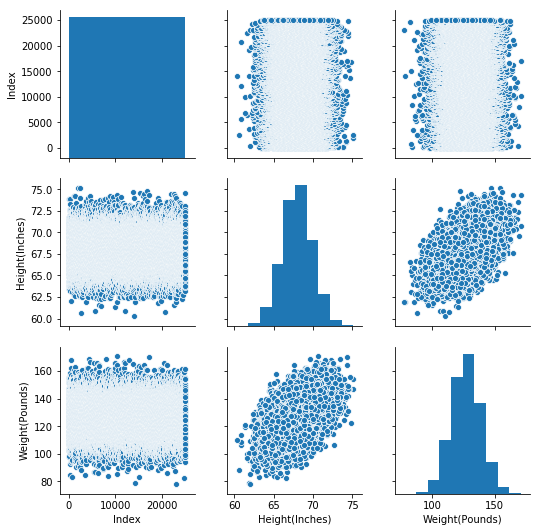

In [19]:
#Plot
plt.figure(figsize=(20, 20))
sns.pairplot(dataset)

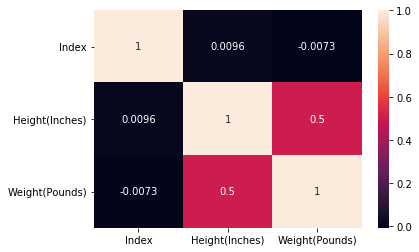

In [20]:
sns.heatmap(dataset.corr(), annot=True)

In [35]:
x=dataset.iloc[:,0:2].values
y=dataset.iloc[:,2].values

In [36]:
y

array([112.9925, 136.4873, 153.0269, ..., 118.2655, 132.2682, 124.8742])

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [38]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
y_pred=reg.predict(x_test)

In [41]:
y_pred

array([129.02313004, 127.89734183, 130.6248107 , ..., 132.79699405,
       119.21797341, 122.91563957])

In [42]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

-2.03193717898821

In [43]:
reg.coef_

array([-2.00071813e-05,  3.08134824e+00])

In [45]:
reg.intercept_

-82.20999814630508

In [47]:
len(x_train)

20000

In [51]:
x_train = np.append(arr=x_train, values=np.ones((20000,1)).astype(int),axis=1)

In [52]:
import statsmodels.formula.api as sm
reg_ols = sm.OLS(endog=y_train, exog=x_train).fit()


In [53]:
reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     3401.
Date:                Tue, 08 Oct 2019   Prob (F-statistic):               0.00
Time:                        19:08:17   Log-Likelihood:                -74584.
No. Observations:               20000   AIC:                         1.492e+05
Df Residuals:                   19997   BIC:                         1.492e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -2.001e-05   9.88e-06     -2.024      0.043   -3.94e-05   -6.36e-07
x2             3.0813      0.037     82.462      0.000       3.008       3.155
const        -82.2100      2.544    -32.316      0.000     -87.196     -77.224
==============================================================================
Omnibus:                        0.149   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.928   Jarque-Bera (JB):                0.166
Skew:                          -0.003   Prob(JB):                        0.920
Kurtosis:                       2.987   Cond. No.                     5.15e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""